In [23]:
import time
import pandas as pd
import numpy as np

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

data = pd.read_csv('version4_district.csv')

#data= data.drop(['Unnamed: 0', 'newdevelopment'], axis=1)

#preu_park_noinclos
#preu_park_noinclos=((data['hasParkingSpace']!=data['isParkingSpaceIncludedInPrice']).astype(float))
#data=pd.concat((data,preu_park_noinclos),axis=1)
#data.drop("isParkingSpaceIncludedInPrice",axis=1)

data.columns

Index([u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'price', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'chalet', u'duplex', u'flat',
       u'penthouse', u'studio', u'good', u'newdevelopment', u'renew',
       u'Ciutat Vella', u'Eixample', u'Gràcia', u'Horta Guinardó',
       u'Les Corts', u'Nou Barris', u'Sant Andreu', u'Sant Martí',
       u'Sants-Montjuïc', u'Sarrià-Sant Gervasi'],
      dtype='object')

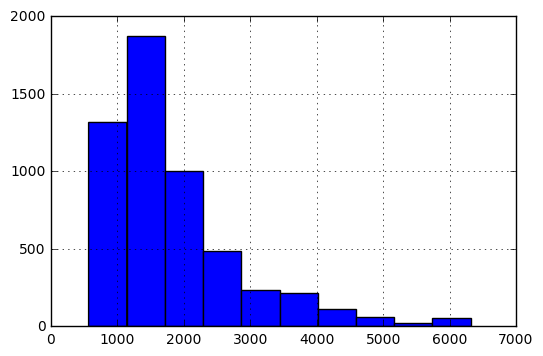

In [24]:
%matplotlib inline
data['price'].hist()

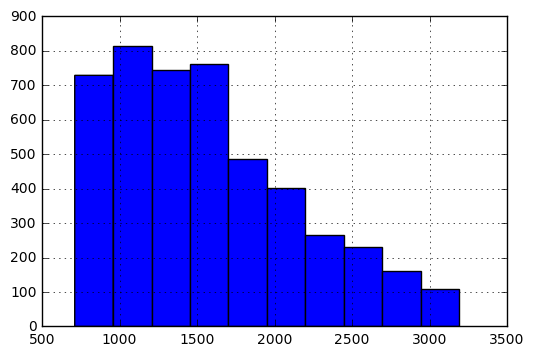

In [25]:
#Remove outliers


per=np.percentile(np.array(data['price']), [2.5, 90])
data=data[data['price']>per[0]]
data=data[data['price']<per[1]]

data['price'].hist()

In [29]:
y =data['price']
X = data.drop(['price'], axis=1)
X=np.array(X)
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [30]:
#Linear regression

# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'normalize' : [True,False]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(LinearRegression(fit_intercept=True), tuned_parameters, cv=10, scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."



Best parameters set found on training set:

{'normalize': False}

Mean Absolute Error:

353.188876348

The model is trained on the training set. The scores are computed on the testing set.


In [31]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [200, 500, 600, 750], 'max_features': ["auto", "sqrt", "log2"]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'max_features': 'sqrt', 'n_estimators': 600, 'bootstrap': False}

Mean Absolute Error:

255.311368333

The model is trained on the training set. The scores are computed on the testing set.
--- 489.953052998 seconds ---


In [16]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [650, 700, 750, 800, 850], 'max_features': ["auto", "sqrt", "log2"]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))

KeyboardInterrupt: 

In [6]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [725, 750, 875], 
                     'max_features': ["auto", "sqrt", "log2"], 
                     'min_samples_leaf': [1, 5, 10, 50, 100, 200]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'max_features': 'sqrt', 'n_estimators': 750, 'bootstrap': False, 'min_samples_leaf': 1}

Mean Absolute Error:

303.088681872

The model is trained on the training set. The scores are computed on the testing set.
--- 2905.41767097 seconds ---
